<a href="https://colab.research.google.com/github/AbhiramNallamothu/Assignments-5731/blob/main/Abhiram_Nallamothu_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
# Write your code here
import csv

filepath = 'clean_imdb_reviews.csv'

def read_dataset(filepath):
    with open(filepath, encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping header row
        return [row[1] for row in reader]

def tokenize(text):
    return text.lower().split()

def ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def count_ngrams(reviews, n):
    ngram_counts = {}
    for review in reviews:
        tokens = tokenize(review)
        for ngram in ngrams(tokens, n):
            ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1
    return ngram_counts

def calculate_bigram_probabilities(reviews):
    bigram_counts = count_ngrams(reviews, 2)
    unigram_counts = count_ngrams(reviews, 1)
    probabilities = {}
    for bigram in bigram_counts:
        probabilities[bigram] = bigram_counts[bigram] / unigram_counts[(bigram[0],)]
    return probabilities

def simple_noun_phrase_extractor(text):
    words = text.split()
    noun_phrases = []
    current_phrase = []

    for i, word in enumerate(words):
        if word[0].isupper() and i != 0:
            current_phrase.append(word)
        else:
            if current_phrase:
                noun_phrases.append(' '.join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))

    return noun_phrases

def count_noun_phrases(reviews):
    phrase_counts = {}
    for review in reviews:
        noun_phrases = simple_noun_phrase_extractor(review)
        for phrase in noun_phrases:
            phrase_counts[phrase] = phrase_counts.get(phrase, 0) + 1
    return phrase_counts

def calculate_relative_probabilities(phrase_counts):
    if not phrase_counts:
        return {}

    max_frequency = max(phrase_counts.values())
    return {phrase: count / max_frequency for phrase, count in phrase_counts.items()}

reviews = read_dataset(filepath)

trigram_counts = count_ngrams(reviews, 3)
print("Trigram counts:", trigram_counts)

# Task 2: Calculate and print bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(reviews)
print("Bigram probabilities:", bigram_probabilities)

# Task 3: Extract noun phrases, calculate their relative probabilities, and print the results
phrase_counts = count_noun_phrases(reviews)
relative_probabilities = calculate_relative_probabilities(phrase_counts)
print("Noun Phrase Relative Probabilities:", relative_probabilities)


Trigram counts: {('title:', 'inception', '(2010)'): 40, ('inception', '(2010)', '-'): 40, ('(2010)', '-', 'a'): 40, ('-', 'a', 'cool'): 40, ('a', 'cool', 'dream'): 40, ('cool', 'dream', 'adventuredirector:'): 40, ('dream', 'adventuredirector:', 'christopher'): 40, ('adventuredirector:', 'christopher', 'nolan'): 40, ('christopher', 'nolan', 'cast:'): 40, ('nolan', 'cast:', 'leonardo'): 40, ('cast:', 'leonardo', 'dicaprio,'): 40, ('leonardo', 'dicaprio,', 'joseph'): 80, ('dicaprio,', 'joseph', 'gordon-levitt,'): 40, ('joseph', 'gordon-levitt,', 'ellen'): 200, ('gordon-levitt,', 'ellen', 'page,'): 200, ('ellen', 'page,', 'tom'): 120, ('page,', 'tom', 'hardy,'): 120, ('tom', 'hardy,', 'ken'): 80, ('hardy,', 'ken', 'watanabe,'): 80, ('ken', 'watanabe,', 'marion'): 40, ('watanabe,', 'marion', 'cotillard,'): 40, ('marion', 'cotillard,', 'cillian'): 40, ('cotillard,', 'cillian', 'murphy,'): 40, ('cillian', 'murphy,', 'michael'): 40, ('murphy,', 'michael', 'cainerating:'): 40, ('michael', 'cain

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [4]:
# Write your code here
import csv
import math

# Define the path to your dataset here
filepath = 'clean_imdb_reviews.csv'

def read_reviews_from_csv(filepath):
    """
    Reads reviews from a specified CSV file.
    Assumes the review text is located in the second column of each row.
    Skips the header of the CSV file.
    Returns a list of review texts.
    """
    reviews = []
    with open(filepath, encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            reviews.append(row[1])
    return reviews

def tokenize(document):
    """
    Tokenizes the input document into a list of terms (words).
    Converts all characters to lowercase to ensure consistency.
    """
    return document.lower().split()

def calculate_tf(document):
    """
    Calculates term frequency (TF) for each term in a single document.
    """
    tf = {}
    tokens = tokenize(document)
    for token in tokens:
        tf[token] = tf.get(token, 0) + 1
    return tf

def calculate_idf(documents):
    """
    Calculates inverse document frequency (IDF) for all terms across all documents.
    """
    N = len(documents)
    idf = {}
    all_tokens_set = set([token for doc in documents for token in tokenize(doc)])
    for token in all_tokens_set:
        containing_docs = sum(1 for doc in documents if token in tokenize(doc))
        idf[token] = math.log(N / containing_docs)
    return idf

def calculate_tf_idf(documents):
    """
    Calculates TF-IDF for each term in each document and creates a TF-IDF matrix.
    """
    idf = calculate_idf(documents)
    tf_idf = {}
    for i, doc in enumerate(documents):
        tf = calculate_tf(doc)
        doc_tf_idf = {}
        for term, tf_val in tf.items():
            doc_tf_idf[term] = tf_val * idf[term]
        tf_idf[i] = doc_tf_idf
    return tf_idf

def cosine_similarity(vector1, vector2):
    """
    Calculates cosine similarity between two TF-IDF vectors.
    """
    intersection = set(vector1.keys()) & set(vector2.keys())
    numerator = sum([vector1[x] * vector2[x] for x in intersection])

    sum1 = sum([vector1[x] ** 2 for x in vector1.keys()])
    sum2 = sum([vector2[x] ** 2 for x in vector2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def rank_documents(query, documents):
    """
    Rank documents by cosine similarity with respect to a given query.
    """
    query_tf = calculate_tf(query)
    tf_idf = calculate_tf_idf(documents)

    similarities = {}
    for doc_index, doc_vector in tf_idf.items():
        similarity = cosine_similarity(doc_vector, query_tf)
        similarities[doc_index] = similarity

    # Sort documents by similarity
    ranked_documents = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return ranked_documents

# Reading the dataset
reviews = read_reviews_from_csv(filepath)

#  query for ranking the documents
query = "An outstanding movie with a haunting performance and best character development"

# Calculate TF-IDF
tf_idf_matrix = calculate_tf_idf(reviews)

# Rank documents based on the query
ranked_docs = rank_documents(query, reviews)

# Display the top 5 ranked documents
print("Top 5 Ranked Documents:")
for index, score in ranked_docs[:5]:
    print(f"Document {index + 1}: Score {score:.4f}")








Top 5 Ranked Documents:
Document 22: Score 0.1219
Document 47: Score 0.1219
Document 72: Score 0.1219
Document 97: Score 0.1219
Document 122: Score 0.1219


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [11]:
# Write your code here

!pip install gensim matplotlib nltk sklearn



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


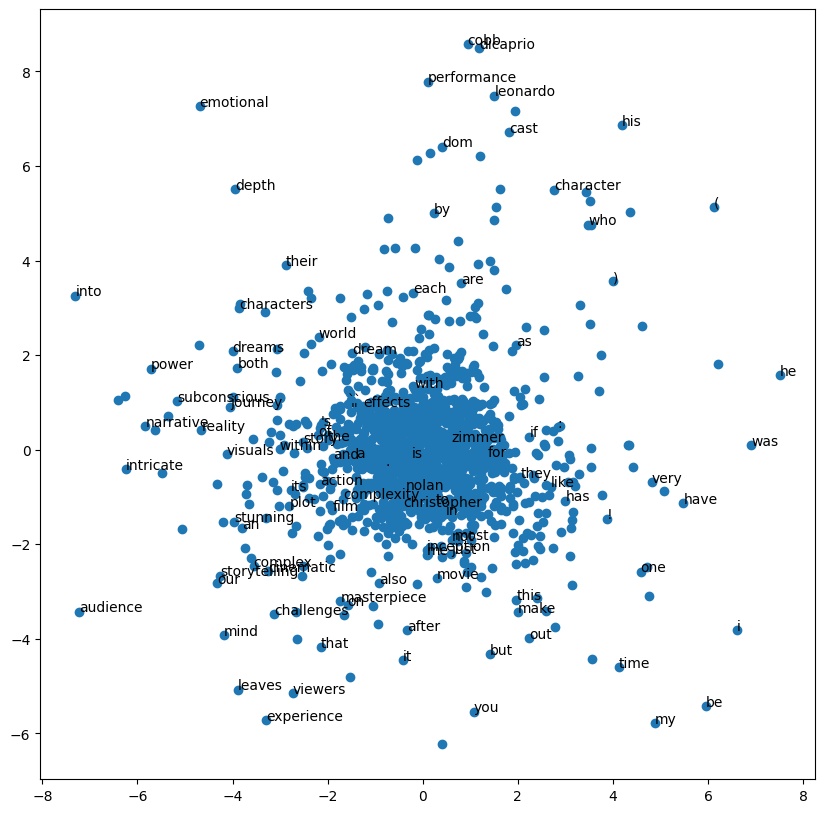

In [12]:
import csv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# Ensure you have the punkt tokenizer downloaded
nltk.download('punkt')

# Function to load the dataset from a CSV file
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Assuming there's a header to skip
        data = [row[1] for row in reader]  # Assuming text is in the second column
    return data

# Function to preprocess the dataset (tokenize text)
def preprocess_data(data):
    return [word_tokenize(doc.lower()) for doc in data]

# Load and preprocess the dataset
filename = 'clean_imdb_reviews.csv'  # Change this to the path of your dataset
raw_data = load_data(filename)
tokenized_data = preprocess_data(raw_data)

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_model.bin")

# Load the model
model = Word2Vec.load("word2vec_model.bin")

# Extract words & their vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words[:100]):  # Adjust to visualize more or fewer words
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/AbhiramNallamothu/Assignments-5731/blob/main/imdb_reviews%20(2).csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
Working on this NLP assignment was a mix of hard spots and exciting bits for me. Getting through the math for N-grams and figuring out TF-IDF from the ground up were tough, but seeing how they work was cool.
The part where I had to create a word embedding model stood out because it showed me how words can be visually understood by computers.
Doing sentiment analysis was different since it was more about thinking and less about coding, which was a nice change.
The whole experience taught me a lot about handling complex tasks and the power of language in technology.